<a href="https://colab.research.google.com/github/orsonmat/RETOS-TLG-ORSINI/blob/main/Solucion_Reto_SC_63_Orsini_Flores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evaluación de campaña Banco

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Cargar la base de datos del banco
data = pd.read_csv('/content/bank_marketing_RETO_DS_AS.csv',header='infer')
data. head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


In [ ]:
#Cambia nombres de columnas para mejorar entendimiento
data = data.rename(columns={
    'housing': 'housing_loan',
    'loan': 'personal_loan',
    'campaign':'current_contacts',
    'pdays':'days_since_last_contact',
    'previous':'previous_contacts',
    'poutcome':'previous_outcome'
    })
data.head()


,age,job,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,current_contacts,days_since_last_contact,previous_contacts,previous_outcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      9000 non-null   int64 
 1   job                      9000 non-null   object
 2   marital                  9000 non-null   object
 3   education                9000 non-null   object
 4   default                  9000 non-null   object
 5   balance                  9000 non-null   int64 
 6   housing_loan             9000 non-null   object
 7   personal_loan            9000 non-null   object
 8   contact                  9000 non-null   object
 9   day                      9000 non-null   int64 
 10  month                    9000 non-null   object
 11  duration                 9000 non-null   int64 
 12  current_contacts         9000 non-null   int64 
 13  days_since_last_contact  9000 non-null   int64 
 14  previous_contacts        9000 non-null  

No se han encontrado vairables con campos vacios, existen muchas variables categoricas, incluida la variable de salida "y", se deberan convertir a numericas con alguna técnica como OneHotEncoder o LabelEncoder

In [ ]:
# Revisar valores unicos para columnas categóricas
for column in data.select_dtypes(include='object').columns:
    print(f"Unique values for column '{column}':")
    print(data[column].unique())
    print("-" * 30)

Unique values for column 'job':
['self-employed' 'unemployed' 'blue-collar' 'admin.' 'retired' 'services'
 'technician' 'management' 'entrepreneur' 'student' 'housemaid' 'unknown']
------------------------------
Unique values for column 'marital':
['married' 'single' 'divorced']
------------------------------
Unique values for column 'education':
['tertiary' 'unknown' 'secondary' 'primary']
------------------------------
Unique values for column 'default':
['no' 'yes']
------------------------------
Unique values for column 'housing_loan':
['no' 'yes']
------------------------------
Unique values for column 'personal_loan':
['no' 'yes']
------------------------------
Unique values for column 'contact':
['cellular' 'unknown' 'telephone']
------------------------------
Unique values for column 'month':
['nov' 'sep' 'jul' 'aug' 'may' 'jun' 'jan' 'mar' 'oct' 'apr' 'feb' 'dec']
------------------------------
Unique values for column 'previous_outcome':
['success' 'unknown' 'failure' 'other'

In [ ]:
#Cambiar variables binarias de yes/no  a 1/0
binary_cols = ['default', 'housing_loan', 'personal_loan', 'y']
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0})
data.head()


,age,job,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,current_contacts,days_since_last_contact,previous_contacts,previous_outcome,y
0,31,self-employed,married,tertiary,0,2666,0,0,cellular,10,nov,318,2,97,6,success,1
1,29,unemployed,single,unknown,0,1584,0,0,cellular,6,sep,245,1,-1,0,unknown,1
2,41,blue-collar,married,secondary,0,2152,1,0,cellular,17,nov,369,1,-1,0,unknown,0
3,50,blue-collar,married,secondary,0,84,1,0,cellular,17,jul,18,8,-1,0,unknown,0
4,40,admin.,married,secondary,0,0,0,0,cellular,28,jul,496,2,182,11,success,1


In [ ]:
#Cambiar valor texto de meses a su valor numerico
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
data['month'] = data['month'].map(month_map)

In [ ]:
#Aplicar labelencoder para campo education. Asumiremos que nivel educativo tiene
#un orden, primara < secundaria < terciaria. en los casos que se desconoce unknown es 0

from sklearn.preprocessing import LabelEncoder


le_education = LabelEncoder()

# Aplicar LabelEncoder a la columna 'education'
data['education'] = LabelEncoder().fit_transform(data['education'])


In [ ]:
#Aplicar OneHotEncoder al resto de variables categorías

onehot_cols = ['job', 'marital', 'contact', 'previous_outcome']
data = pd.get_dummies(data, columns=onehot_cols).astype(int)

In [ ]:
#Validar nuevamente la estructura de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       9000 non-null   int64
 1   education                 9000 non-null   int64
 2   default                   9000 non-null   int64
 3   balance                   9000 non-null   int64
 4   housing_loan              9000 non-null   int64
 5   personal_loan             9000 non-null   int64
 6   day                       9000 non-null   int64
 7   month                     9000 non-null   int64
 8   duration                  9000 non-null   int64
 9   current_contacts          9000 non-null   int64
 10  days_since_last_contact   9000 non-null   int64
 11  previous_contacts         9000 non-null   int64
 12  y                         9000 non-null   int64
 13  job_admin.                9000 non-null   int64
 14  job_blue-collar           9000 non-null 

In [ ]:
# Eliminar las columnas creadas para los valores unknown de cualquier variable
# Original, si todas las columnas estan en 0 querra decir que se desconce el valor
# de dicha variable

unknown_cols = [col for col in data.columns if 'unknown' in col]
data = data.drop(columns=unknown_cols)

In [ ]:
# Procesara por separado variable "days_since_last_contact" debido a que posse
# el valor especial -1 para indicar que el cliente no fue contactado.

# Se separaran los calos cuando el cliente no fue contactado en una nueva variable, boleana
# mientras que en la columna original, los -1 se pasarán a 0

data['was_previously_contacted'] = (data['days_since_last_contact'] != -1).astype(int)
data['days_since_last_contact'] = data['days_since_last_contact'].replace(-1, 0)

In [ ]:
#Validar cambios
print(data['was_previously_contacted'].value_counts())
print(data['days_since_last_contact'].value_counts())

was_previously_contacted
0    6781
1    2219
Name: count, dtype: int64
days_since_last_contact
0      6781
182      70
92       68
181      62
183      54
       ... 
245       1
56        1
476       1
490       1
850       1
Name: count, Length: 437, dtype: int64


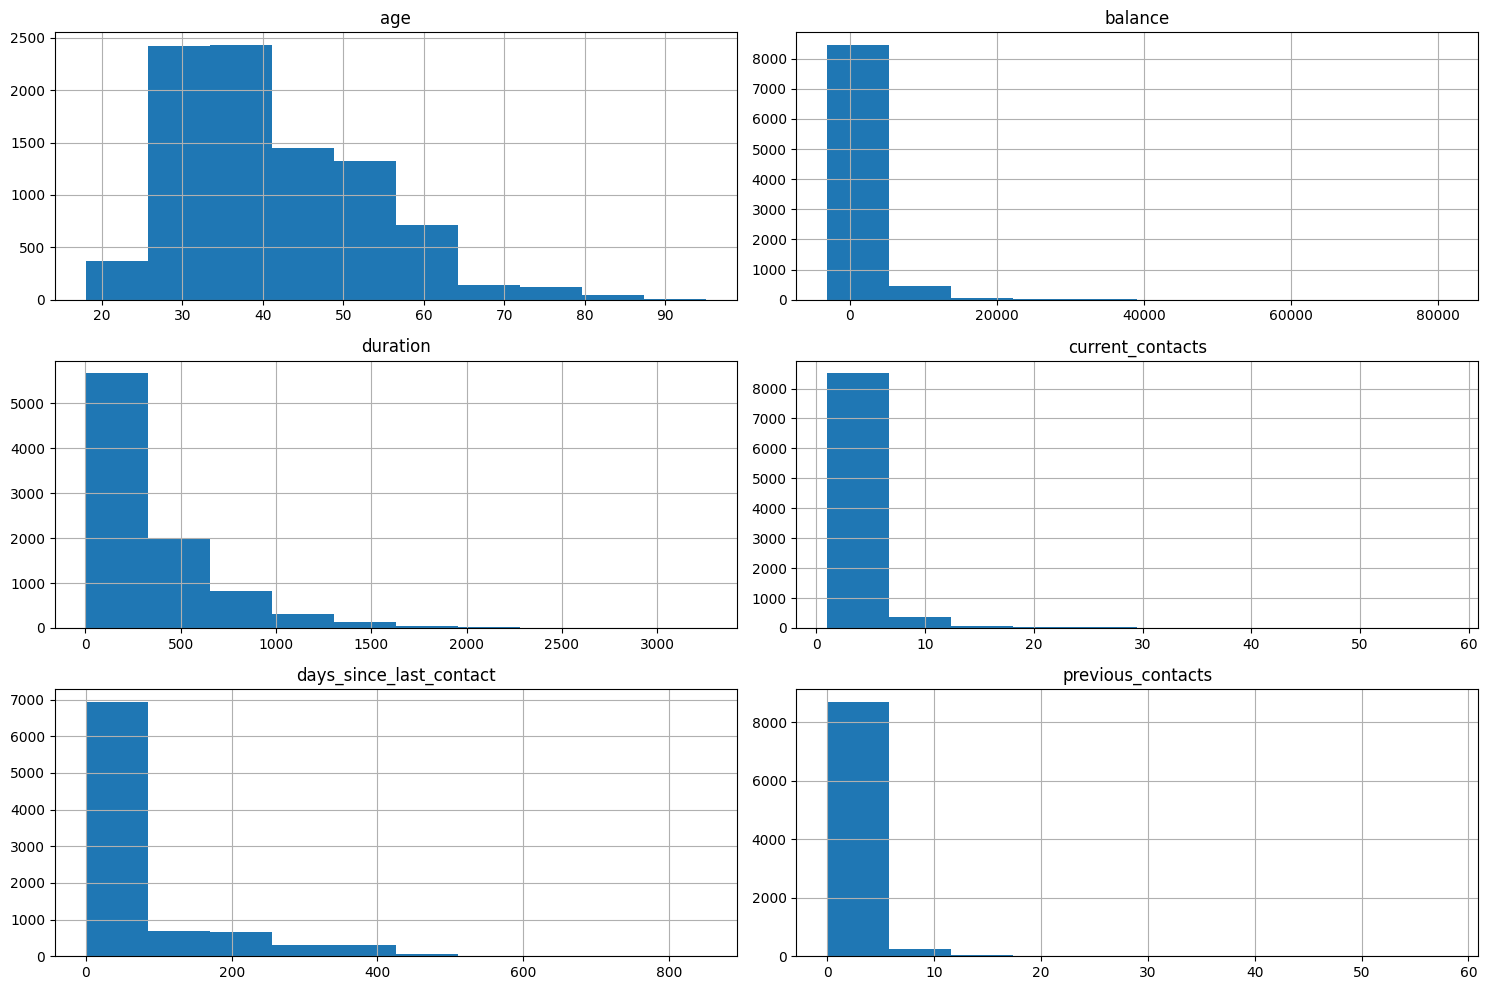

               age       balance     duration  current_contacts  \
count  9000.000000   9000.000000  9000.000000       9000.000000   
mean     41.090556   1482.262778   353.832778          2.520111   
std      11.664253   3031.013197   336.945158          2.737758   
min      18.000000  -3058.000000     3.000000          1.000000   
25%      32.000000    109.000000   131.000000          1.000000   
50%      39.000000    519.000000   240.500000          2.000000   
75%      49.000000   1646.500000   462.000000          3.000000   
max      95.000000  81204.000000  3253.000000         58.000000   

       days_since_last_contact  previous_contacts  
count              9000.000000        9000.000000  
mean                 51.264778           0.788889  
std                 107.331795           2.210273  
min                   0.000000           0.000000  
25%                   0.000000           0.000000  
50%                   0.000000           0.000000  
75%                   0.000000  

In [ ]:
# validar distribución de variables numericas

numerical_cols = ['age', 'balance', 'duration', 'current_contacts',
                           'days_since_last_contact', 'previous_contacts']

# Ver histogramas de variables numericas
data[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

print(data[numerical_cols].describe())

In [ ]:
# cuanto negativos tiene variable balance
print(data[data['balance'] < 0].shape[0])

646


In [ ]:
# Dado que hay multiples valores negativos en balance se aplicara transformación
# especial yeo-johnson para esa variable.

from sklearn.preprocessing import PowerTransformer, StandardScaler

# Transformación Yeo-Johnson para corregir el sesgo
pt = PowerTransformer(method='yeo-johnson')
data['balance'] = pt.fit_transform(data[['balance']])

#Para resto de variables se aplica transformacion logaritmica
numerical_cols2 = ['age', 'duration', 'current_contacts','days_since_last_contact', 'previous_contacts']
for col in numerical_cols2:
    data[col] = np.log1p(data[col])


In [ ]:
#Validar nuevamente la estructura del dataframe
print(data.info())
print(data[numerical_cols].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       9000 non-null   float64
 1   education                 9000 non-null   int64  
 2   default                   9000 non-null   int64  
 3   balance                   9000 non-null   float64
 4   housing_loan              9000 non-null   int64  
 5   personal_loan             9000 non-null   int64  
 6   day                       9000 non-null   int64  
 7   month                     9000 non-null   int64  
 8   duration                  9000 non-null   float64
 9   current_contacts          9000 non-null   float64
 10  days_since_last_contact   9000 non-null   float64
 11  previous_contacts         9000 non-null   float64
 12  y                         9000 non-null   int64  
 13  job_admin.                9000 non-null   int64  
 14  job_blue

In [ ]:
# Con los datos transformados para reducir los sesgos, se procede a estandarizar
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

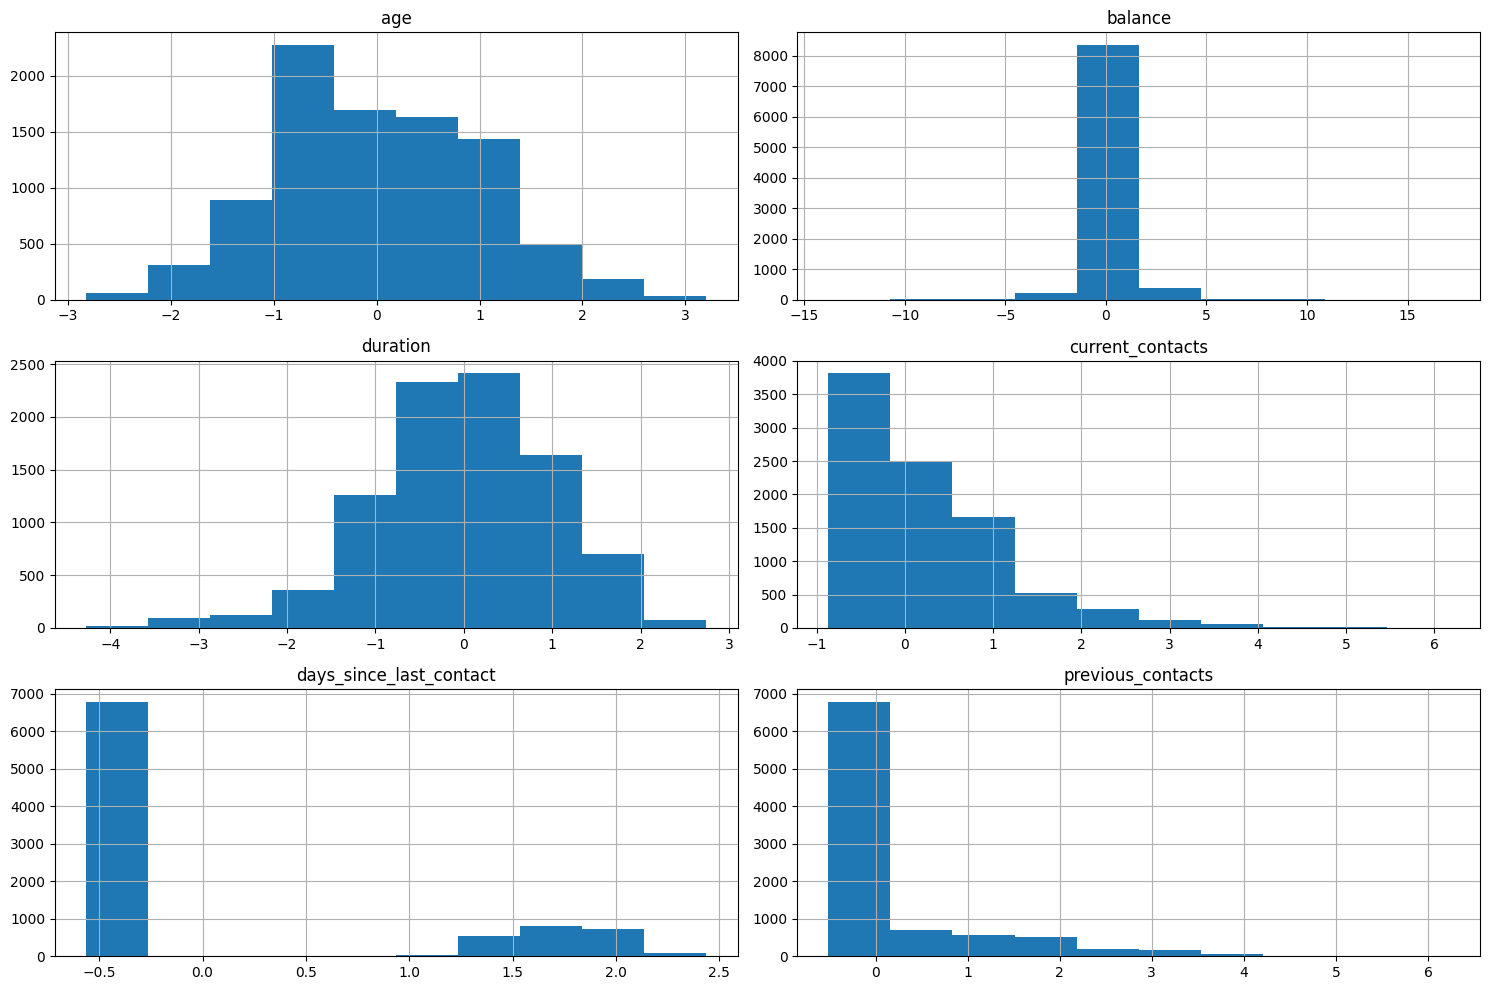

                age       balance      duration  current_contacts  \
count  9.000000e+03  9.000000e+03  9.000000e+03      9.000000e+03   
mean  -7.105427e-16 -7.006741e-18  3.489554e-16      2.293474e-16   
std    1.000056e+00  1.000056e+00  1.000056e+00      1.000056e+00   
min   -2.823968e+00 -1.379370e+01 -4.277537e+00     -8.678896e-01   
25%   -7.694448e-01 -4.148191e-01 -6.130738e-01     -8.678896e-01   
50%   -5.353290e-02 -2.197427e-01  2.000802e-02     -2.525908e-02   
75%    7.768957e-01  2.102884e-01  7.021320e-01      5.725968e-01   
max    3.204523e+00  1.705500e+01  2.745710e+00      6.165491e+00   

       days_since_last_contact  previous_contacts  
count             9.000000e+03       9.000000e+03  
mean              3.157968e-17      -1.144763e-17  
std               1.000056e+00       1.000056e+00  
min              -5.644377e-01      -5.119885e-01  
25%              -5.644377e-01      -5.119885e-01  
50%              -5.644377e-01      -5.119885e-01  
75%           

In [ ]:
# Plot histograms for original numerical columns
data[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

print(data[numerical_cols].describe())

In [ ]:
y = data['y']
data = data.drop(columns=['y'])
data.insert(0, 'Resultado', y)
data.head()

,Resultado,age,education,default,balance,housing_loan,personal_loan,day,month,duration,...,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,previous_outcome_failure,previous_outcome_other,previous_outcome_success,was_previously_contacted
0,1,-0.883961,2,0,0.552547,0,0,10,11,0.311701,...,0,0,1,0,1,0,0,0,1,1
1,1,-1.124142,3,0,0.188271,0,0,6,9,0.039359,...,1,0,0,1,1,0,0,0,0,0
2,0,0.128040,1,0,0.383536,1,0,17,11,0.467137,...,0,0,1,0,1,0,0,0,0,0
3,0,0.850591,1,0,-0.429160,1,0,17,7,-2.644547,...,0,0,1,0,1,0,0,0,0,0
4,1,0.038361,1,0,-0.488004,0,0,28,7,0.776399,...,0,0,1,0,1,0,0,0,1,1


In [ ]:
# Validar balance de clase de la variable de salida
import pandas as pd
import matplotlib.pyplot as plt

# Conteo de clases
conteo = data['Resultado'].value_counts().sort_index()

# Porcentaje de clases
porcentaje = data['Resultado'].value_counts(normalize=True).sort_index() * 100

# Crear tabla resumen
balance_df = pd.DataFrame({
    'Clase': ['No (0)', 'Sí (1)'],
    'Cantidad': conteo.values,
    'Porcentaje': porcentaje.values.round(2)
})

print(balance_df)

    Clase  Cantidad  Porcentaje
0  No (0)      5213       57.92
1  Sí (1)      3787       42.08


Los danos no muestran un desbalance despropocionado. Por tanto no es necesario aplicar ajustes.

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Resultado', axis=1)
y = data['Resultado']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5400, 32)
X_val shape: (1800, 32)
X_test shape: (1800, 32)
y_train shape: (5400,)
y_val shape: (1800,)
y_test shape: (1800,)


🔹 Reporte de Clasificación - Modelo Base:

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1035
           1       0.77      0.77      0.77       765

    accuracy                           0.80      1800
   macro avg       0.80      0.80      0.80      1800
weighted avg       0.80      0.80      0.80      1800

0.8016666666666666


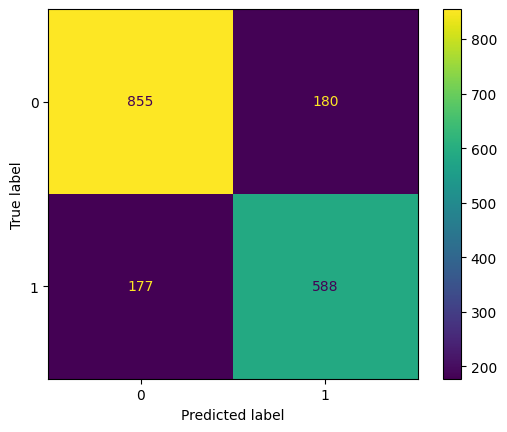

In [ ]:
# Configuración del modelo RL basa de regresion logística, validacion de metricas con classification_report
# Visualización de matriz de confusion

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Modelo base
modelo_base = LogisticRegression(random_state=42, max_iter=1000)
modelo_base.fit(X_train, y_train)

# Predicción en conjunto de validación
y_pred_val_base = modelo_base.predict(X_val)

# Reporte de métricas
print("🔹 Reporte de Clasificación - Modelo Base:\n")
print(classification_report(y_val, y_pred_val_base))
print(modelo_base.score(X_val, y_val))

# Matriz de confusión
cm_base = confusion_matrix(y_val, y_pred_val_base)
ConfusionMatrixDisplay(confusion_matrix=cm_base).plot()

In [ ]:
# Implementacion de Grid Search para evaluar distintas combinaciones de parametros
# para identificar la combinacion optima

from sklearn.model_selection import GridSearchCV

# Modelo base para el gridsearch
modelo = LogisticRegression(random_state=42, max_iter=1000)

# Grid de hiperparámetros
param_grid = {
    'C': [0.1,0.15,0.2,0.3,0.5, 1, 10, 100],
    'penalty': ['l2', 'elasticnet','none'],
    'solver': ['newton-cg', 'lbfgs', 'saga']
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=modelo,
                           param_grid=param_grid,
                           scoring = 'f1', # Se desea balance entre Recall y Preccisio para el problema de telemarketing
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("🔹 Mejores parámetros encontrados:")
print(grid_search.best_params_)
print("🔹 Mejor F1-score (CV):", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
240 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

🔹 Mejores parámetros encontrados:
{'C': 0.15, 'penalty': 'l2', 'solver': 'saga'}
🔹 Mejor F1-score (CV): 0.7711721684264398


🔹 Reporte de Clasificación - Mejor Modelo RL:

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1035
           1       0.77      0.77      0.77       765

    accuracy                           0.80      1800
   macro avg       0.80      0.80      0.80      1800
weighted avg       0.80      0.80      0.80      1800

0.8038888888888889


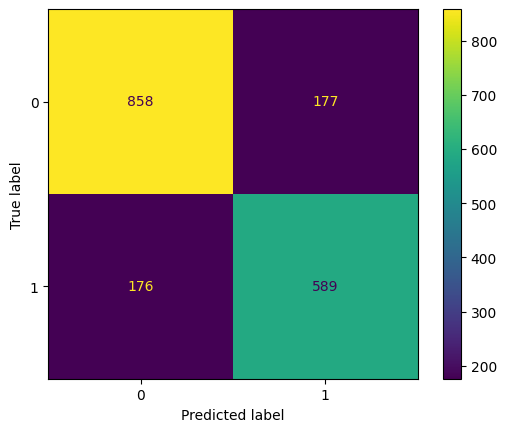

In [ ]:
# Ajustar modelo con valores encontrados del GridSeach

mejor_modelo_RL= grid_search.best_estimator_
#parametros {'C': 0.15, 'penalty': 'l2', 'solver': 'saga'}

# Predicción en conjunto de validación
y_pred_val_mejor = mejor_modelo_RL.predict(X_val)

# Métricas del mejor modelo
print("🔹 Reporte de Clasificación - Mejor Modelo RL:\n")
print(classification_report(y_val, y_pred_val_mejor))
print(mejor_modelo_RL.score(X_val, y_val))

# Matriz de confusión
cm_mejor = confusion_matrix(y_val, y_pred_val_mejor)
ConfusionMatrixDisplay(confusion_matrix=cm_mejor).plot()

El ajuste del grid seach para el modelo RL obtuvo una mejora minima versus el modelo base. Para efectos practicos de manejara con el resultado del Grid Seach

**Implementacion del segundo modelo, con red Neuronal Multicapa**

🔹 Reporte de Clasificación - MLP Base:

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.75      0.84      0.79       765

    accuracy                           0.81      1800
   macro avg       0.81      0.81      0.81      1800
weighted avg       0.82      0.81      0.81      1800

0.8105555555555556


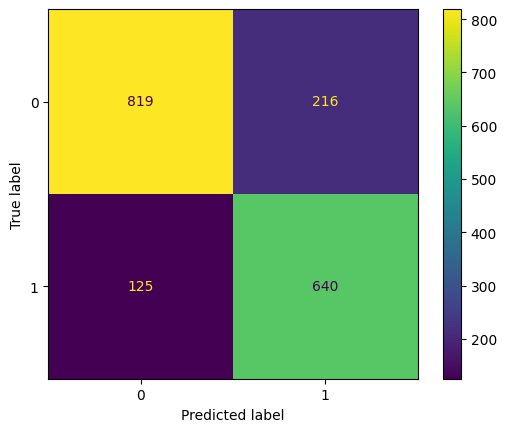

In [ ]:
# Nuevo modelo con red neuronal

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Modelo base de red neuronal
modelo_mlp_base = MLPClassifier(
    hidden_layer_sizes=(20, 10),  # 2 capas ocultas: 20 y 10 neuronas (20 = 2/3 de shape de X_train)
    max_iter=1000,
    random_state=42
)

# Entrenar con el conjunto de entrenamiento
modelo_mlp_base.fit(X_train, y_train)

# Predicciones en validación
y_pred_val_mlp = modelo_mlp_base.predict(X_val)

# Reporte de métricas
print("🔹 Reporte de Clasificación - MLP Base:\n")
print(classification_report(y_val, y_pred_val_mlp))
print(modelo_mlp_base.score(X_val, y_val))

# Matriz de confusión
cm_mlp_base = confusion_matrix(y_val, y_pred_val_mlp)
ConfusionMatrixDisplay(confusion_matrix=cm_mlp_base).plot()

In [ ]:
#Modelo base MLP
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Rango de hiperparámetros para MLP
param_grid = {
    'hidden_layer_sizes': ([ (10,), (20,), (20, 10), (40, 20), (40, 20, 10)]),
    'alpha': [0.001, 0.01, 0.3,0.7]  # regularización L2
}

# Grid Search para MLP
grid_search_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='f1', # Se desea balance entre Recall y Preccisio para el problema de telemarketing - optimiza recursos, identifica protenciales
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_mlp.fit(X_train, y_train)

# Mejores parámetros
print("\n🔹 Mejor configuración encontrada:")
print(grid_search_mlp.best_params_)
print("🔹 Mejor F1-score (CV):", grid_search_mlp.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

🔹 Mejor configuración encontrada:
{'alpha': 0.7, 'hidden_layer_sizes': (20, 10)}
🔹 Mejor F1-score (CV): 0.7865208560759366



🔹 Reporte de Clasificación - MLP Optimizado:

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.74      0.86      0.80       765

    accuracy                           0.81      1800
   macro avg       0.81      0.82      0.81      1800
weighted avg       0.82      0.81      0.81      1800

0.8138888888888889


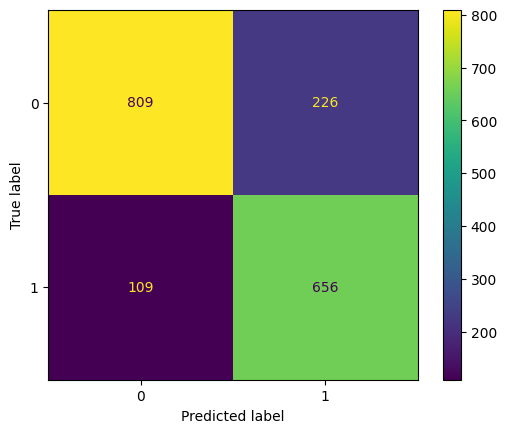

In [ ]:
# Usamos el mejor modelo del grid search MLP para predecir sobre el conjunto de validación
mejor_mlp = grid_search_mlp.best_estimator_
#{'alpha': 0.7, 'hidden_layer_sizes': (20, 10)}

y_pred_val_mejor_mlp = mejor_mlp.predict(X_val)

# Reporte
print("\n🔹 Reporte de Clasificación - MLP Optimizado:\n")
print(classification_report(y_val, y_pred_val_mejor_mlp))
print(mejor_mlp.score(X_val, y_val))

# Matriz de confusión
cm_mlp_final = confusion_matrix(y_val, y_pred_val_mejor_mlp)
ConfusionMatrixDisplay(confusion_matrix=cm_mlp_final).plot()

El modelo MLP encontrado con el Grid Search mejora en los parametros claves de Recall y F1 al modelo base. Por tanto se considerara el modelo ajustado de MLP



🔹 Reporte de Clasificación - MLP Optimizado:

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.74      0.86      0.80       765

    accuracy                           0.81      1800
   macro avg       0.81      0.82      0.81      1800
weighted avg       0.82      0.81      0.81      1800

🔸 Score (accuracy) MLP: 0.8139


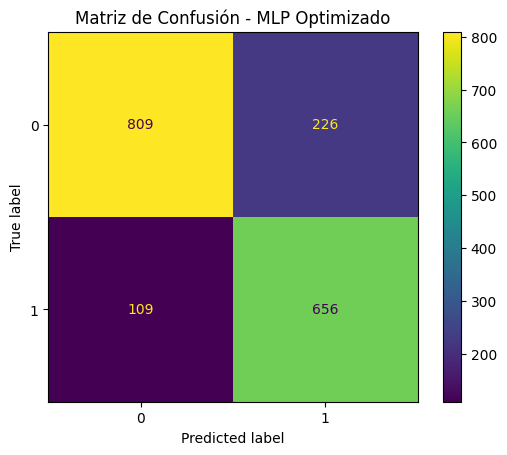


🔹 Reporte de Clasificación - Mejor Modelo RL:

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1035
           1       0.77      0.77      0.77       765

    accuracy                           0.80      1800
   macro avg       0.80      0.80      0.80      1800
weighted avg       0.80      0.80      0.80      1800

🔸 Score (accuracy) RL: 0.8039


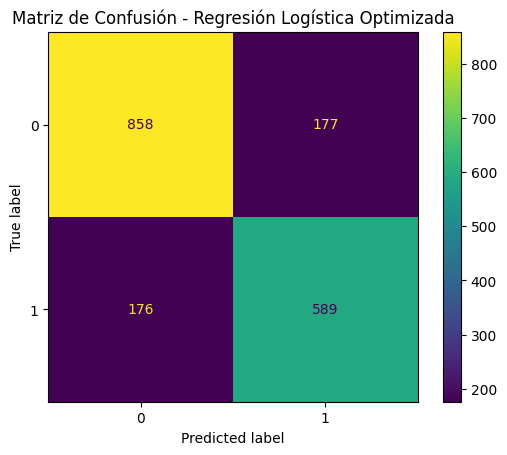

In [ ]:
# === MLP Optimizado ===
print("\n🔹 Reporte de Clasificación - MLP Optimizado:\n")
print(classification_report(y_val, y_pred_val_mejor_mlp))
print(f"🔸 Score (accuracy) MLP: {mejor_mlp.score(X_val, y_val):.4f}")

# Matriz de confusión MLP
cm_mlp_final = confusion_matrix(y_val, y_pred_val_mejor_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp_final)
fig, ax = plt.subplots()
disp_mlp.plot(ax=ax)
ax.set_title("Matriz de Confusión - MLP Optimizado")
plt.show()


# === Regresión Logística Optimizada ===
print("\n🔹 Reporte de Clasificación - Mejor Modelo RL:\n")
print(classification_report(y_val, y_pred_val_mejor))
print(f"🔸 Score (accuracy) RL: {mejor_modelo_RL.score(X_val, y_val):.4f}")

# Matriz de confusión RL
cm_mejor = confusion_matrix(y_val, y_pred_val_mejor)
disp_rl = ConfusionMatrixDisplay(confusion_matrix=cm_mejor)
fig, ax = plt.subplots()
disp_rl.plot(ax=ax)
ax.set_title("Matriz de Confusión - Regresión Logística Optimizada")
plt.show()

Comparativa de Modelos RL y ML

El problema al que nos enfrentamos es el de detectar que clientes se suscribieran al servicio del banco. Por tanto, lo que mas importa es detectar a los clientes potenciales para el servicio (clase 1). Por tanto, el mejor modelo debe de prestar los mejores resultados para las prediccioens de la clase 1.

Basados en los resultados de los modelos RL y MLP, se concluye que el modelo MLP es el mejor ya que muestra resultados mayores en las metricas claves Recall (86% vs 77%) y F1 (80% vs 77%) en la identificación de la clase 1.

🔹 Reporte de Clasificación - Conjunto de Prueba:

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1015
           1       0.77      0.84      0.80       785

    accuracy                           0.82      1800
   macro avg       0.82      0.82      0.82      1800
weighted avg       0.82      0.82      0.82      1800

🔸 Score (accuracy) MLP: 0.8211


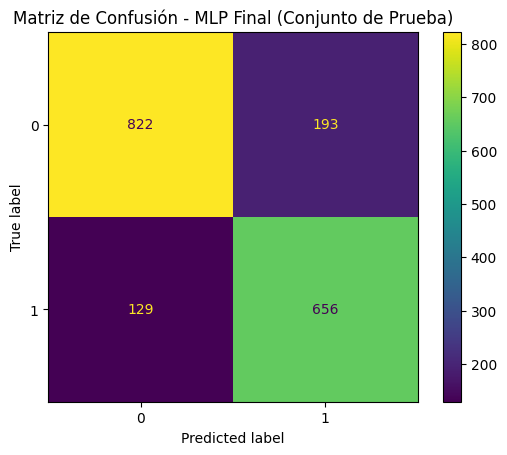

In [ ]:
# Predicciones en el conjunto de prueba
y_pred_test = mejor_mlp.predict(X_test)

# Reporte de métricas en el conjunto de prueba
print("🔹 Reporte de Clasificación - Conjunto de Prueba:\n")
print(classification_report(y_test, y_pred_test))
print(f"🔸 Score (accuracy) MLP: {mejor_mlp.score(X_test, y_test):.4f}")

# Matriz de confusión para el conjunto de prueba
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)

# Crear figura y aplicar título
fig, ax = plt.subplots()
disp_test.plot(ax=ax)
ax.set_title("Matriz de Confusión - MLP Final (Conjunto de Prueba)")
plt.show()


Conclusiones:

El modelo final MLP utilizado para el problema de clasificacion de clientes pontencias tiene una precisión del 82.1% por lo que el banco podra predecir con ese nivel de precision si los clientes se suscribiran a al servicio.

En particular, el recall de la clase 1 (clientes que si suscribiran) es de 84%. por tanto el banco tiene aun mayor certeza al detectar clientes potenciales.


En general el uso de las tecnicas de machine learning en la mercadotecnia permite que las empresas puedan aprovechar los datos recopilados sobre miles de usuarios para entrenar modelos que agilicen la toma de decisiones informadas. Los modelos  de machine learning para la predicción y clasificación brindan una oportunidad unica para la optimizacion de recuersos al reducir la probabilidad de fracaso que puedan tener las distintas acciones de marketing dirigido a los clientes.